In [1]:
from google.colab import drive
import os
import json
import numpy as np
import pandas as pd
from typing import Dict, List
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

### 0. Load Preprocessed Data From Drive

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
DATA_DIR = "/content/drive/MyDrive/CS6140_final_project/Data/"
PREPROCESSED_DATA_F = 'old_preprocessed_data_24hourwindows.csv'
PREPROCESSED_DATA_LOC = os.path.join(DATA_DIR, PREPROCESSED_DATA_F)

In [9]:
df = pd.read_csv(
    PREPROCESSED_DATA_LOC,
)
print(f"- {format(len(df), ',')} total rows in df.")
df.head(3)

- 876,100 total rows in df.


,datetime,machineID,volt,rotate,pressure,vibration,machineID_time_window,order_in_time_window,machine_example_ID,step_ID,comp1_maint,comp2_maint,comp3_maint,comp4_maint,error1,error2,error3,error4,error5,comp1_failure,comp2_failure,comp3_failure,comp4_failure,age,model2,model3,model4
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,1,1,"(001, 001)","(001, 001, 001)",0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,1,0
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,1,2,"(001, 001)","(001, 001, 002)",0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,1,0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,1,3,"(001, 001)","(001, 001, 003)",0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,1,0


In [10]:
df = df[
    [
        'datetime',
        'machine_example_ID', 'step_ID',
        'machineID', 'age',
        'model2', 'model3', 'model4',
        'machineID_time_window', 'order_in_time_window',
        'volt', 'rotate', 'pressure', 'vibration',
        'comp1_maint', 'comp2_maint', 'comp3_maint', 'comp4_maint',
        'error1', 'error2', 'error3', 'error4', 'error5',
        'comp1_failure', 'comp2_failure', 'comp3_failure', 'comp4_failure',
    ]
]

In [11]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['machine_example_ID'] = df['machine_example_ID'].astype(str)
df['step_ID'] = df['step_ID'].astype(str)
df['machineID'] = df['machineID'].astype(int)

df['age'] = df['age'].astype(int)
df['model2'] = df['model2'].astype(int)
df['model3'] = df['model3'].astype(int)
df['model4'] = df['model4'].astype(int)
df['machineID_time_window'] = df['machineID_time_window'].astype(int)
df['order_in_time_window'] = df['order_in_time_window'].astype(int)
df['volt'] = df['volt'].astype(float)
df['rotate'] = df['rotate'].astype(float)
df['pressure'] = df['pressure'].astype(float)
df['vibration'] = df['vibration'].astype(float)
df['comp1_maint'] = df['comp1_maint'].astype(int)
df['comp2_maint'] = df['comp2_maint'].astype(int)
df['comp3_maint'] = df['comp3_maint'].astype(int)
df['comp4_maint'] = df['comp4_maint'].astype(int)
df['error1'] = df['error1'].astype(int)
df['error2'] = df['error2'].astype(int)
df['error3'] = df['error3'].astype(int)
df['error4'] = df['error4'].astype(int)
df['error5'] = df['error5'].astype(int)
df['comp1_failure'] = df['comp1_failure'].astype(int)
df['comp2_failure'] = df['comp2_failure'].astype(int)
df['comp3_failure'] = df['comp3_failure'].astype(int)
df['comp4_failure'] = df['comp4_failure'].astype(int)

In [12]:
df.head()

,datetime,machine_example_ID,step_ID,machineID,age,model2,model3,model4,machineID_time_window,order_in_time_window,volt,rotate,pressure,vibration,comp1_maint,comp2_maint,comp3_maint,comp4_maint,error1,error2,error3,error4,error5,comp1_failure,comp2_failure,comp3_failure,comp4_failure
0,2015-01-01 06:00:00,"(001, 001)","(001, 001, 001)",1,18,0,1,0,1,1,176.217853,418.504078,113.077935,45.087686,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-01-01 07:00:00,"(001, 001)","(001, 001, 002)",1,18,0,1,0,1,2,162.879223,402.747490,95.460525,43.413973,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-01-01 08:00:00,"(001, 001)","(001, 001, 003)",1,18,0,1,0,1,3,170.989902,527.349825,75.237905,34.178847,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-01-01 09:00:00,"(001, 001)","(001, 001, 004)",1,18,0,1,0,1,4,162.462833,346.149335,109.248561,41.122144,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-01-01 10:00:00,"(001, 001)","(001, 001, 005)",1,18,0,1,0,1,5,157.610021,435.376873,111.886648,25.990511,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
df[
    (df['machineID'] == 8)
    & (
        (df['comp1_failure'] == 1)
        | (df['comp2_failure'] == 1)
        | (df['comp3_failure'] == 1)
        | (df['comp4_failure'] == 1)
    )
].head()

,datetime,machine_example_ID,step_ID,machineID,age,model2,model3,model4,machineID_time_window,order_in_time_window,volt,rotate,pressure,vibration,comp1_maint,comp2_maint,comp3_maint,comp4_maint,error1,error2,error3,error4,error5,comp1_failure,comp2_failure,comp3_failure,comp4_failure
62887,2015-03-07 06:00:00,"(008, 010)","(008, 010, 049)",8,16,0,1,0,10,49,186.111201,272.846523,100.144288,38.786208,0,0,0,0,0,0,0,0,0,0,1,0,0
63247,2015-03-22 06:00:00,"(008, 012)","(008, 012, 073)",8,16,0,1,0,12,73,145.107914,508.797606,107.481497,53.170995,0,0,0,0,0,0,0,0,0,0,0,0,1
63967,2015-04-21 06:00:00,"(008, 016)","(008, 016, 121)",8,16,0,1,0,16,121,181.265334,396.334832,90.640684,40.790658,0,0,0,0,0,0,0,0,0,0,1,0,0
66487,2015-08-04 06:00:00,"(008, 031)","(008, 031, 121)",8,16,0,1,0,31,121,165.084956,359.427763,92.797597,52.632997,0,0,0,0,0,0,0,0,0,0,0,0,1
68287,2015-10-18 06:00:00,"(008, 042)","(008, 042, 073)",8,16,0,1,0,42,73,156.997811,420.111487,104.661848,54.476699,0,0,0,0,0,0,0,0,0,0,0,0,1


### 1. `MachineID`-Specific Plots

In [15]:
sub_df = df[
    (df['machineID'] == 1)
    & (df['datetime'].between('2015-01-01', '2015-01-15'))
    #(df['machineID'] == 8)
    #& (df['datetime'].between('2015-03-05', '2015-03-24'))
]
print(f"- {format(len(sub_df), ',')} total rows in sub_df.")
sub_df.head()

- 331 total rows in sub_df.


,datetime,machine_example_ID,step_ID,machineID,age,model2,model3,model4,machineID_time_window,order_in_time_window,volt,rotate,pressure,vibration,comp1_maint,comp2_maint,comp3_maint,comp4_maint,error1,error2,error3,error4,error5,comp1_failure,comp2_failure,comp3_failure,comp4_failure
0,2015-01-01 06:00:00,"(001, 001)","(001, 001, 001)",1,18,0,1,0,1,1,176.217853,418.504078,113.077935,45.087686,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-01-01 07:00:00,"(001, 001)","(001, 001, 002)",1,18,0,1,0,1,2,162.879223,402.747490,95.460525,43.413973,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-01-01 08:00:00,"(001, 001)","(001, 001, 003)",1,18,0,1,0,1,3,170.989902,527.349825,75.237905,34.178847,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-01-01 09:00:00,"(001, 001)","(001, 001, 004)",1,18,0,1,0,1,4,162.462833,346.149335,109.248561,41.122144,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-01-01 10:00:00,"(001, 001)","(001, 001, 005)",1,18,0,1,0,1,5,157.610021,435.376873,111.886648,25.990511,0,0,0,0,0,0,0,0,0,0,0,0,0


##### 1.1) Failures, Errors, and Maintenances Plot

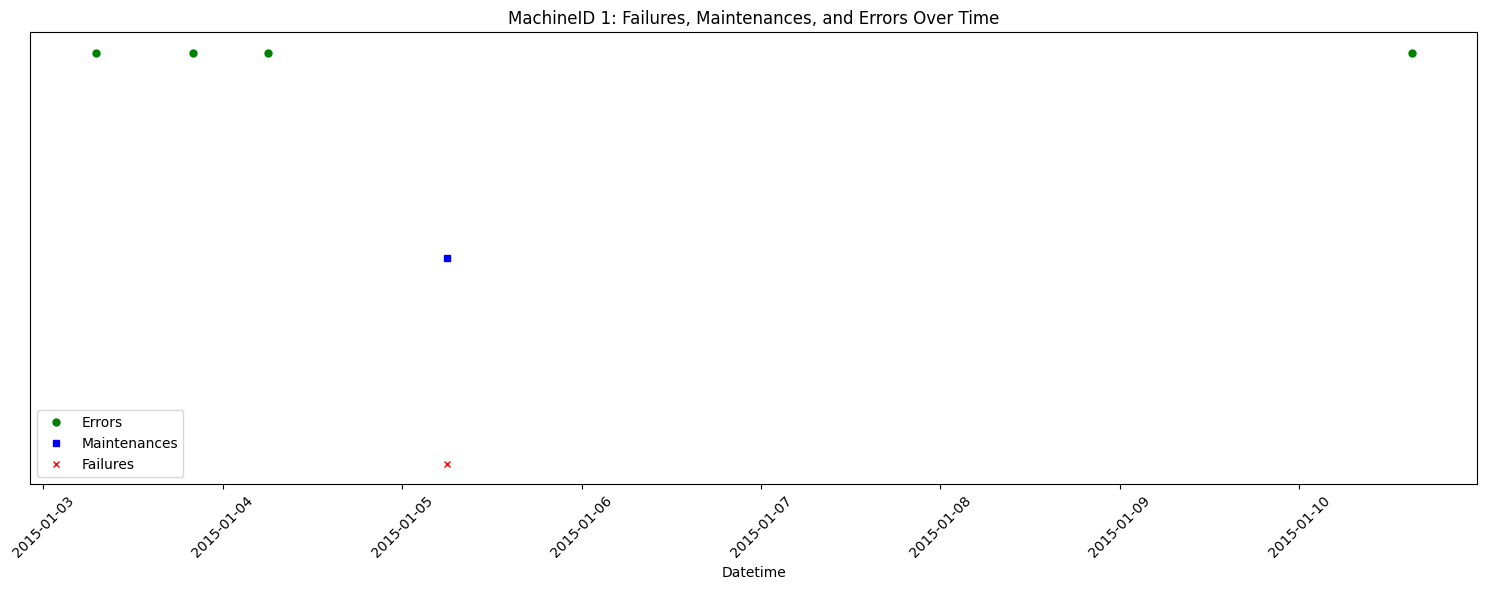

In [16]:
failure_dates = sub_df['datetime'][
    sub_df[
        ['comp1_failure', 'comp2_failure', 'comp3_failure', 'comp4_failure']
    ].max(axis = 1) > 0
]

maintenance_dates = sub_df['datetime'][
    sub_df[
        ['comp1_maint', 'comp2_maint', 'comp3_maint', 'comp4_maint']
    ].max(axis=1) > 0
]
error_dates = sub_df['datetime'][
    sub_df[
        ['error1', 'error2', 'error3', 'error4', 'error5']
    ].max(axis=1) > 0
]

plt.figure(
    figsize = (15, 6)
)  # Adjusted for better visibility of all lines
# Plot error markers above maintenance markers, e.g., at y=2
plt.plot(error_dates, np.full_like(error_dates, 2), 'go', label='Errors', markersize=5)  # "go" uses green circle markers
# Plot maintenance markers at y=1
plt.plot(maintenance_dates, np.ones_like(maintenance_dates), 'bs', label='Maintenances', markersize=5)  # "bs" uses blue square markers
# Plot failure markers at y=0
plt.plot(failure_dates, np.zeros_like(failure_dates), 'rx', label='Failures', markersize=5)  # "rx" uses red "x" markers
plt.yticks([])  # Hide y-axis as it's not informative in this context
plt.xlabel('Datetime')
plt.title('MachineID 1: Failures, Maintenances, and Errors Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


##### 1.2) `volt`, `rotate`, `pressure`, and `vibration` Plot

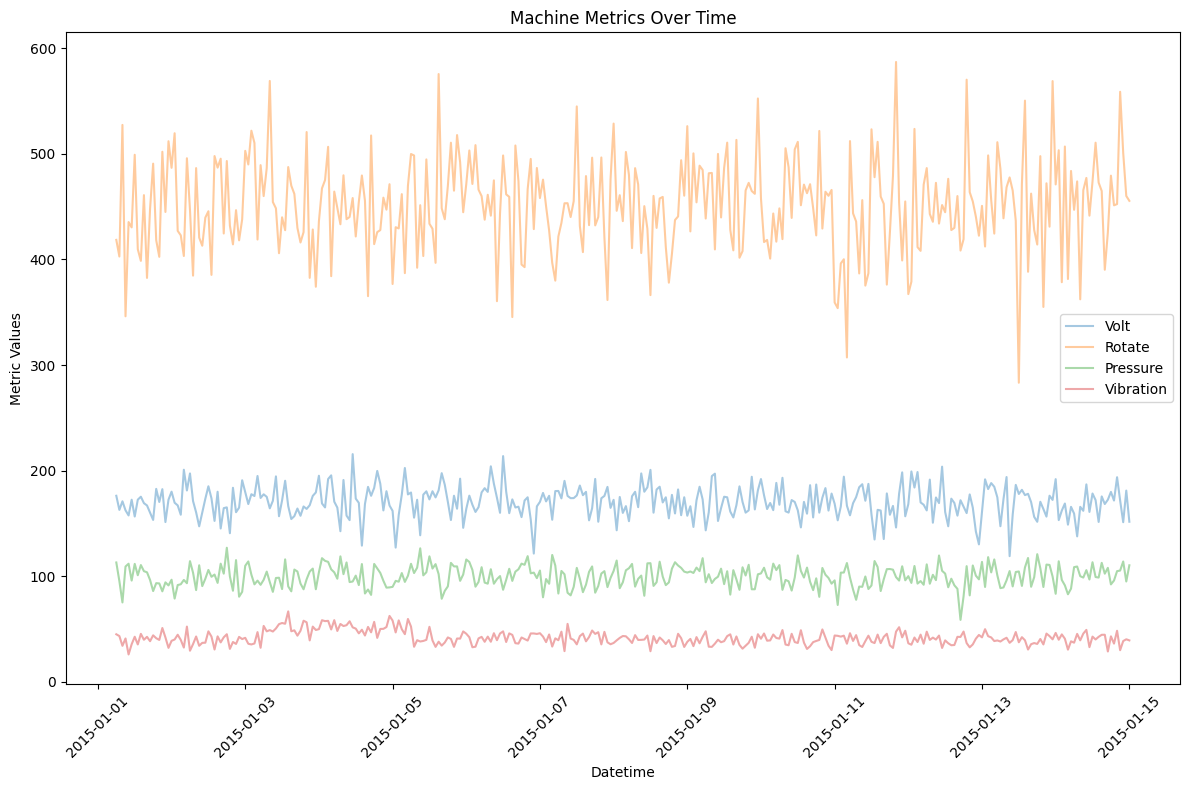

In [17]:
plt.figure(
    figsize = (12, 8)
)
plt.plot(
    sub_df['datetime'],
    sub_df['volt'],
    label = 'Volt',
    alpha = 0.4
)
plt.plot(
    sub_df['datetime'],
    sub_df['rotate'],
    label = 'Rotate',
    alpha = 0.4
)
plt.plot(
    sub_df['datetime'],
    sub_df['pressure'],
    label = 'Pressure',
    alpha = 0.4
)
plt.plot(
    sub_df['datetime'],
    sub_df['vibration'],
    label = 'Vibration',
    alpha = 0.4
)
plt.xlabel('Datetime')
plt.ylabel('Metric Values')
plt.title('Machine Metrics Over Time')
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.show()

##### 1.3) Plot Maintenance/Errors/Failures Over Volt/Rotation/Pressure/Vibration

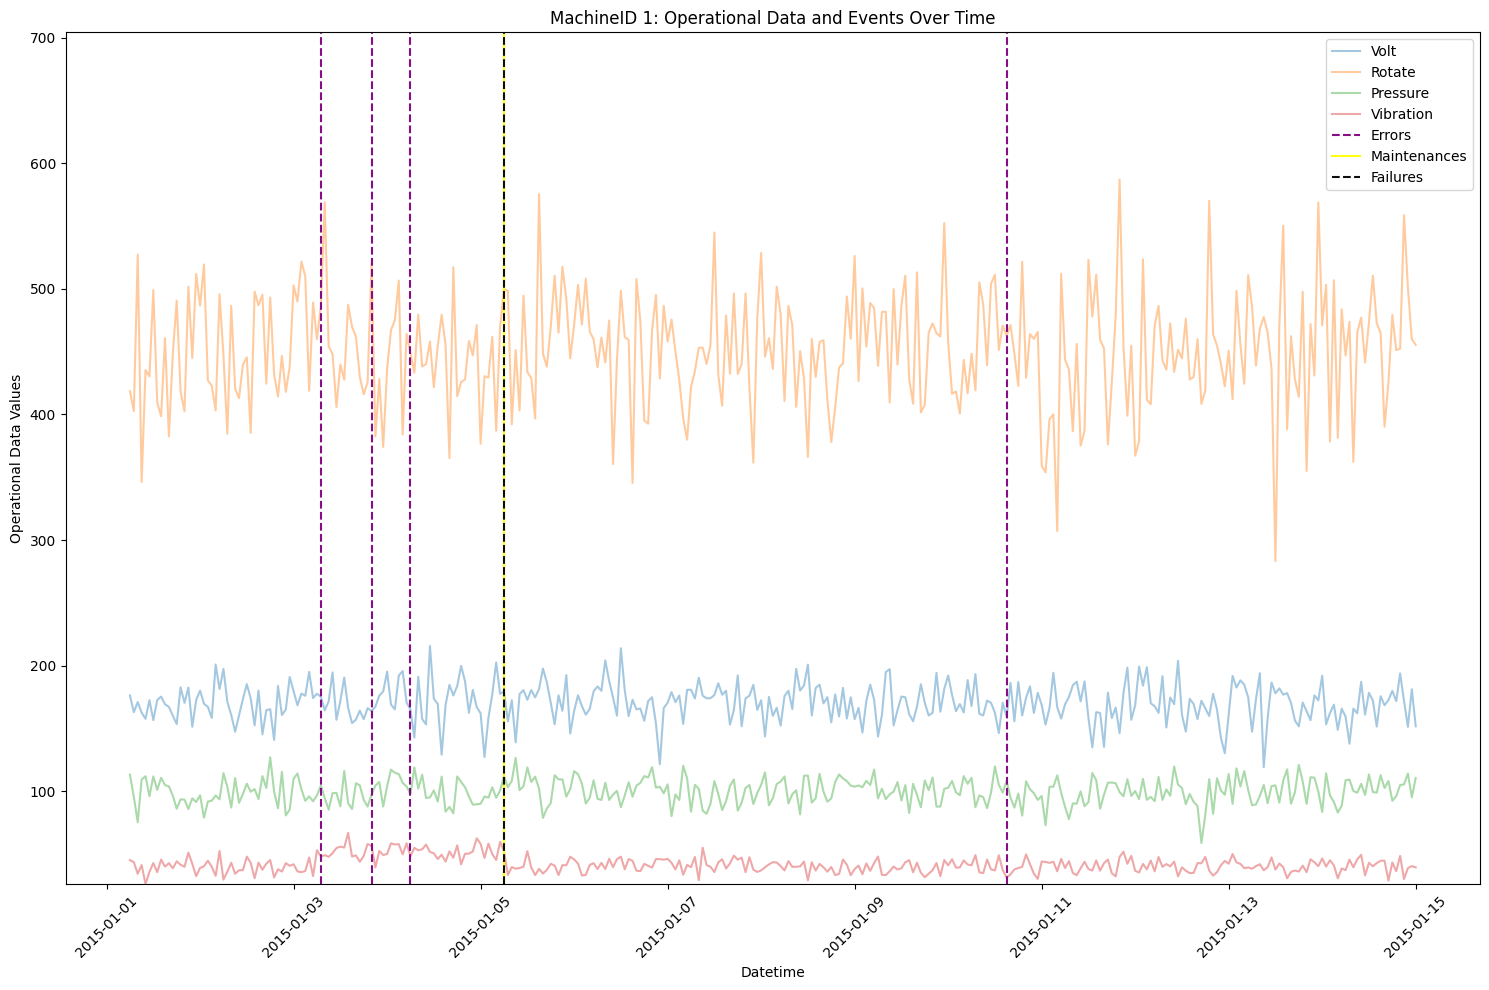

In [18]:
# Get the max and min values from your operational data for y-limits
max_val = max(sub_df[['volt', 'rotate', 'pressure', 'vibration']].max())
min_val = min(sub_df[['volt', 'rotate', 'pressure', 'vibration']].min())


plt.figure(figsize=(15, 10))

# Plot operational data with transparency
plt.plot(sub_df['datetime'], sub_df['volt'], label='Volt', alpha=0.4)
plt.plot(sub_df['datetime'], sub_df['rotate'], label='Rotate', alpha=0.4)
plt.plot(sub_df['datetime'], sub_df['pressure'], label='Pressure', alpha=0.4)
plt.plot(sub_df['datetime'], sub_df['vibration'], label='Vibration', alpha=0.4)

# Draw vertical bars for errors, maintenances, and failures
# Use different colors and labels for each type
for date in error_dates:
    plt.axvline(x=date, color='purple', linestyle='--', alpha=0.95, label='Errors' if date == error_dates.iloc[0] else "")
for date in maintenance_dates:
    plt.axvline(x=date, color='yellow', linestyle='-', alpha=0.95, label='Maintenances' if date == maintenance_dates.iloc[0] else "")
for date in failure_dates:
    plt.axvline(x=date, color='black', linestyle='--', alpha=0.95, label='Failures' if date == failure_dates.iloc[0] else "")

# Adjusting the plot
plt.xlabel('Datetime')
plt.ylabel('Operational Data Values')
plt.title('MachineID 1: Operational Data and Events Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Adjust y-limits based on the operational data
plt.ylim(bottom=min_val, top=max_val + max_val * 0.2)  # Extend the y-axis to accommodate the markers

plt.show()


### 2. Determine How Often Maintenance and Errors Precede Failures

In [19]:
# Add any_failure, any_error, and any_maintenance columns
df['any_failure'] = df[
    ['comp1_failure', 'comp2_failure', 'comp3_failure', 'comp4_failure']
].max(axis=1)
df['any_error'] = df[
    ['error1', 'error2', 'error3', 'error4', 'error5']
].max(axis=1)
df['any_maintenance'] = df[
    ['comp1_maint', 'comp2_maint', 'comp3_maint', 'comp4_maint']
].max(axis=1)

In [20]:
def calc_precedence_percent(
    df: pd.DataFrame,
    timeframes: List[int],
    event_col: str ='any_error'
):
    results = {}
    for hours in timeframes:
        precedences = []
        for machine_id, group in df.groupby('machineID'):
            # Sort by datetime to ensure chronological order
            group = group.sort_values(by='datetime')
            # Identify rows where a failure occurs
            failure_rows = group[group['any_failure'] == 1]
            for _, failure_row in failure_rows.iterrows():
                # Look back within the specified timeframe
                lookback_period = failure_row['datetime'] - pd.Timedelta(hours=hours)
                relevant_period = group[
                    (group['datetime'] >= lookback_period)
                    & (group['datetime'] < failure_row['datetime'])
                ]
                # Check if an event (error/maintenance) occurred in this timeframe
                if (relevant_period[event_col] == 1).any():
                    precedences.append(1)
                else:
                    precedences.append(0)
        # Calculate the percentage for this timeframe
        if precedences:
            percent_preceded = sum(precedences) / len(precedences)
        else:
            percent_preceded = 0
        results[hours] = percent_preceded
    return results

In [21]:
timeframes = [4, 8, 12, 18, 24, 48, 72, 96, 120]
error_precedence_percent = calc_precedence_percent(
    df,
    timeframes,
    'any_error'
)
maintenance_precedence_percent = calc_precedence_percent(
    df,
    timeframes,
    'any_maintenance'
)

print("Percentage of failures preceded by an error within specified hours:")
print(error_precedence_percent)

print("Percentage of failures preceded by maintenance within specified hours:")
print(maintenance_precedence_percent)


Percentage of failures preceded by an error within specified hours:
{4: 0.016689847009735744, 8: 0.03337969401947149, 12: 0.0458970792767733, 18: 0.06675938803894298, 24: 0.980528511821975, 48: 0.980528511821975, 72: 0.980528511821975, 96: 0.980528511821975, 120: 0.980528511821975}
Percentage of failures preceded by maintenance within specified hours:
{4: 0.0, 8: 0.0, 12: 0.0, 18: 0.0, 24: 0.004172461752433936, 48: 0.004172461752433936, 72: 0.004172461752433936, 96: 0.004172461752433936, 120: 0.004172461752433936}
